<a href="https://colab.research.google.com/github/shijiayi233/sleep/blob/main/notebooks/clustering/clustering_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

from google.colab import drive
drive.mount('/gdrive')

from os.path import join
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from scipy.stats import ks_2samp
from statsmodels.stats.power import TTestIndPower

import numpy as np
import pandas as pd
import seaborn as sns
from sleep.src import google_drive
from sleep.src import clustering

useful_data = google_drive.useful_datasets()

Cloning into 'sleep'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (490/490), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 1115 (delta 305), reused 324 (delta 188), pack-reused 625
Receiving objects: 100% (1115/1115), 31.71 MiB | 26.18 MiB/s, done.
Resolving deltas: 100% (667/667), done.
/content/sleep/sleep/sleep
Processing /content/sleep/sleep/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=09409e47fc3c2126641a6b59f720a029ea936540e9f83a75b4613da1c39a8223
  Stored in directory: /tmp/pip-ephem-wheel-cache-n537akm9/wheels/c2/1a/9b/01a02b78a25737ca051bd25328be6c59453a5773458e9aae93
Successfully built sleep
  Attempting uninstall: sleep
    Found existing installation: sleep 0.11
    Uninstalling sleep-0.11:
      Successfully uninstalled sleep-0.11
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=

In [5]:
!git pull

Already up to date.


In [6]:
exp_id = '5HT2afl05b_1'
exp_name = '7_1'
ts_name = 'TSeries-07012021-0854_MCs_afternoon-002'
eeg_file = 'velo_eeg.csv'
dfof_file  = 'dfof.csv'

In [7]:
exp_path = google_drive.return_exp_path(exp_id, exp_name, ts_name)
processed_sleep_df = pd.read_csv(join(exp_path, 'eeg', eeg_file))
#file_name = dfof_file if 'mc' not in dfof_file else 'dfof_mc.csv'  # Adjust for different file naming
dfof_data = pd.read_csv(join(exp_path, dfof_file))
dfof_data.set_index('roi_label', drop=True, inplace=True)
summary_sleep = clustering.df_generator(processed_sleep_df)

Cohen's d: -0.28
Required sample size per group: 203.43
KS Statistic: 0.132
P-value: 0.000
Cohen's d: 0.02
Required sample size per group: 32582.11
KS Statistic: 0.048
P-value: 0.000
Cohen's d: 0.11
Required sample size per group: 1260.40
KS Statistic: 0.082
P-value: 0.000
Cohen's d: 0.29
Required sample size per group: 193.25
KS Statistic: 0.172
P-value: 0.000
Cohen's d: 0.12
Required sample size per group: 1037.97
KS Statistic: 0.086
P-value: 0.000
Cohen's d: 0.16
Required sample size per group: 592.61
KS Statistic: 0.080
P-value: 0.000
Cohen's d: 0.07
Required sample size per group: 3604.80
KS Statistic: 0.044
P-value: 0.000
Cohen's d: -0.13
Required sample size per group: 919.12
KS Statistic: 0.168
P-value: 0.000


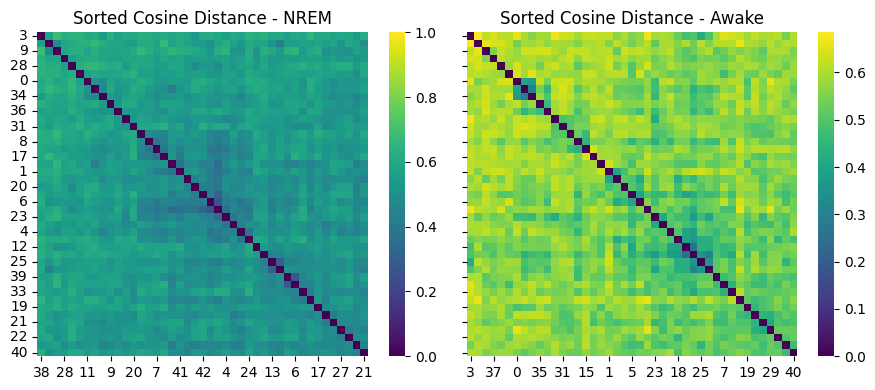

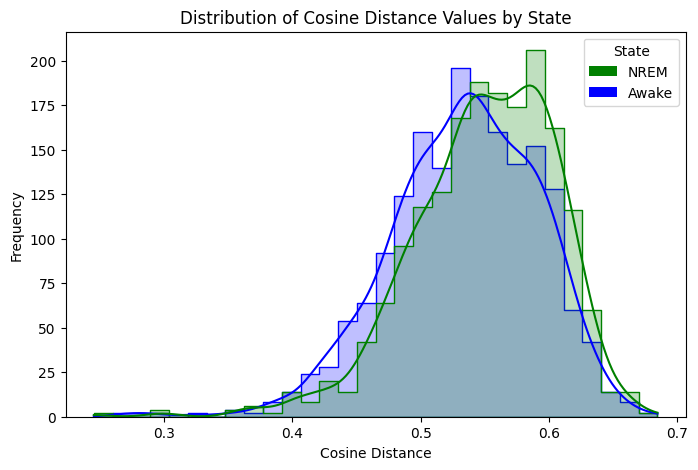

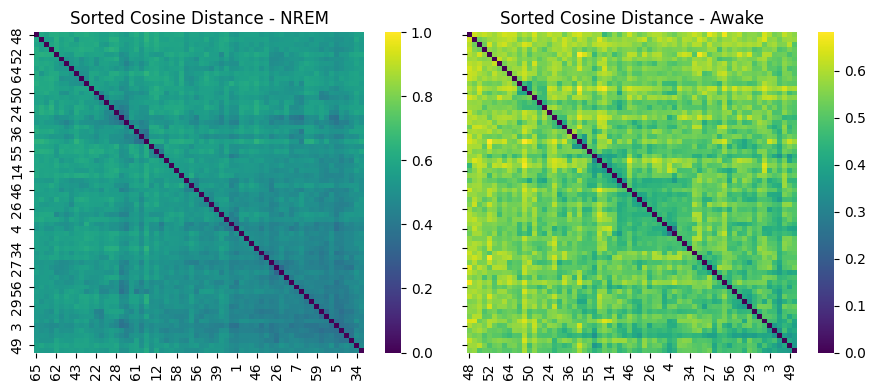

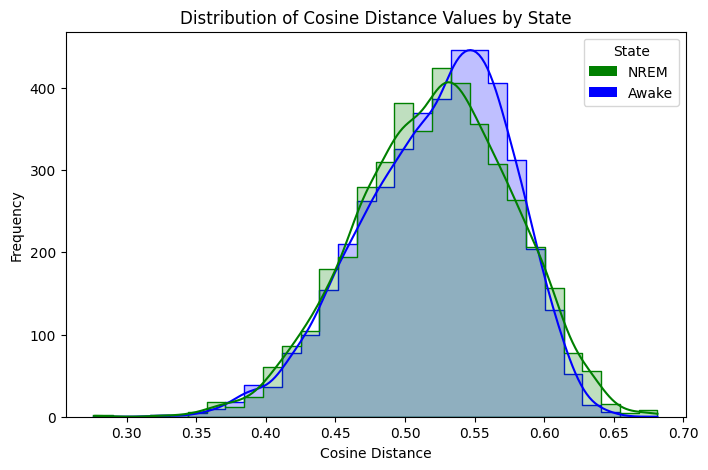

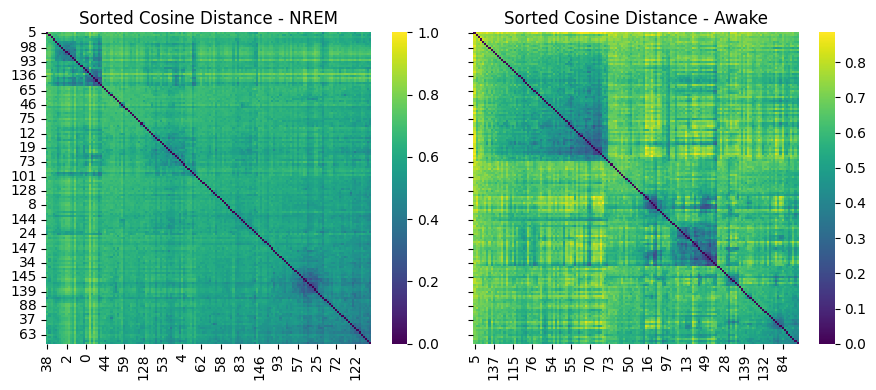

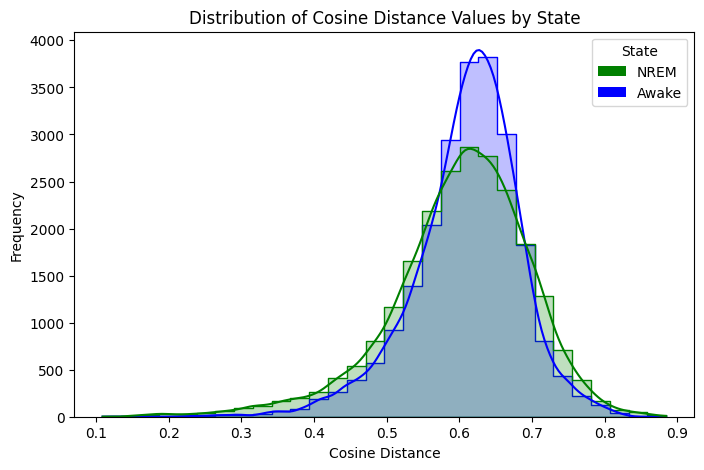

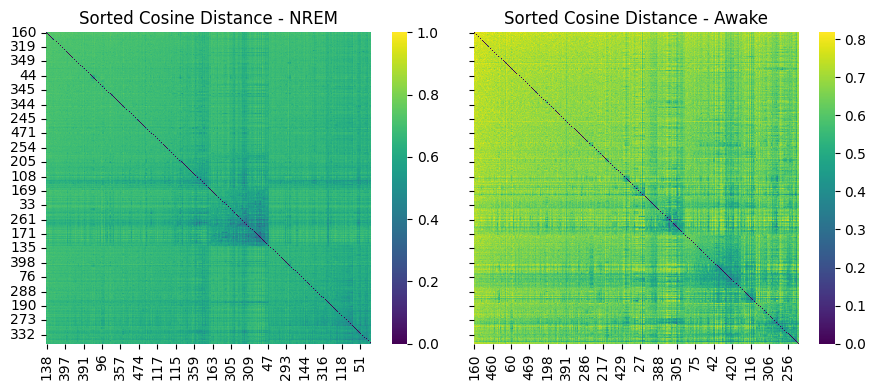

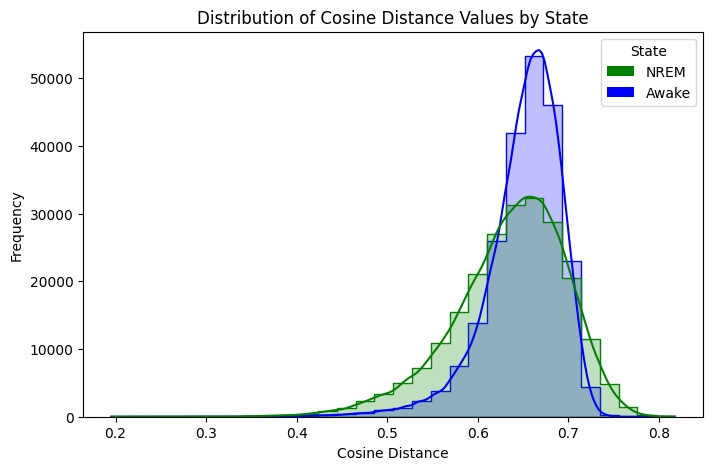

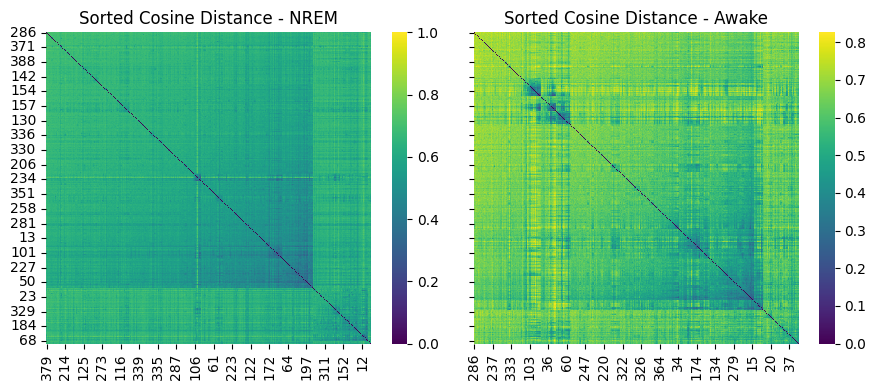

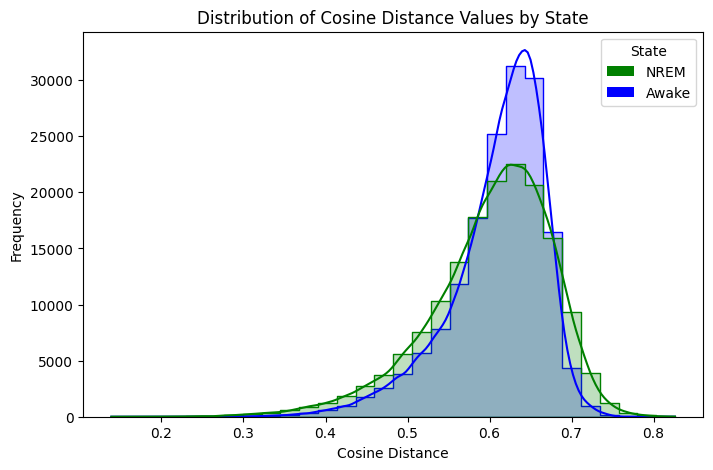

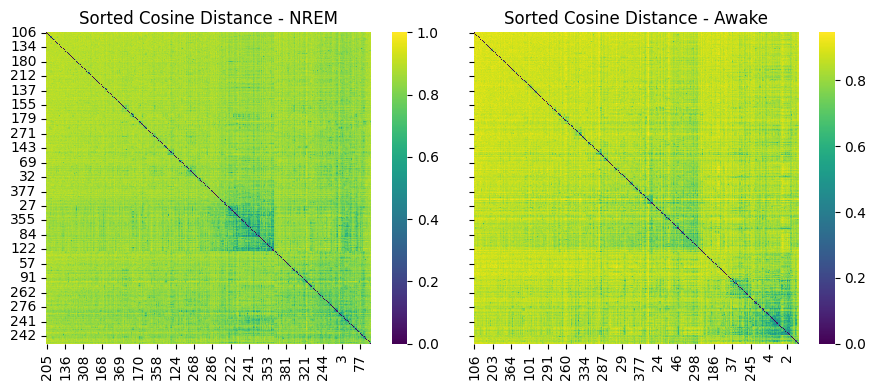

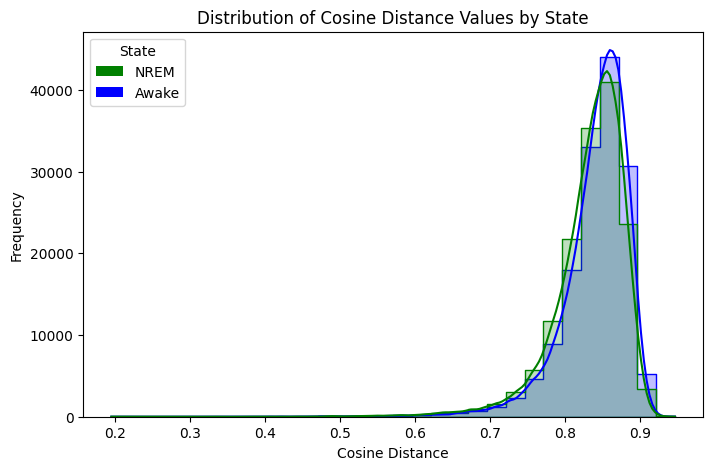

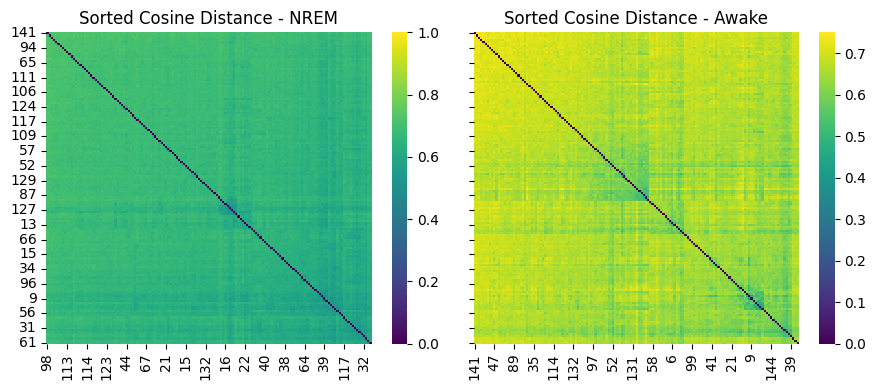

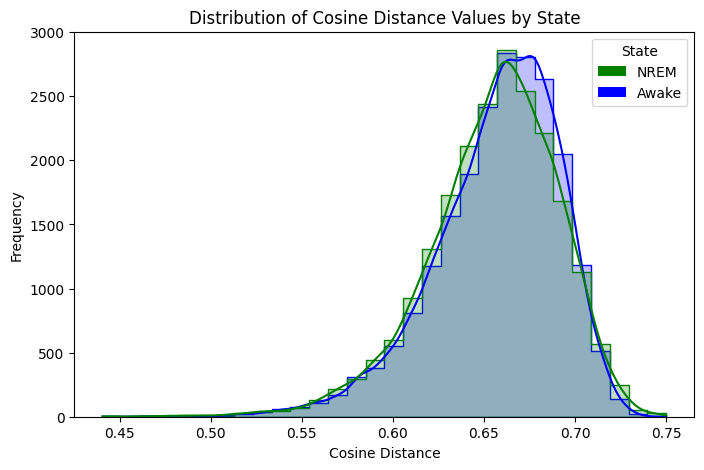

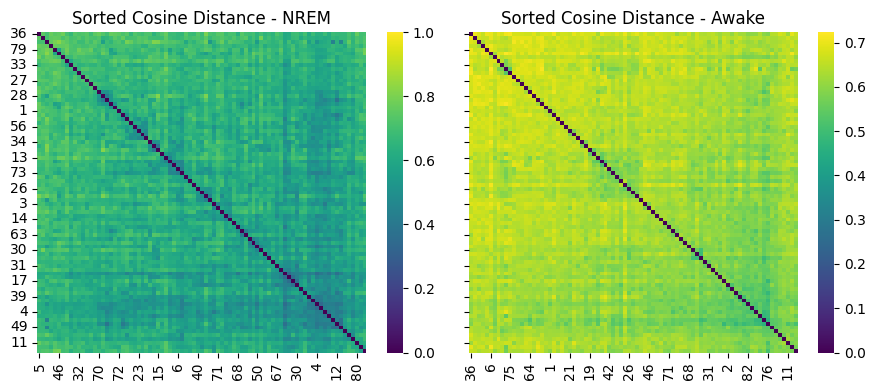

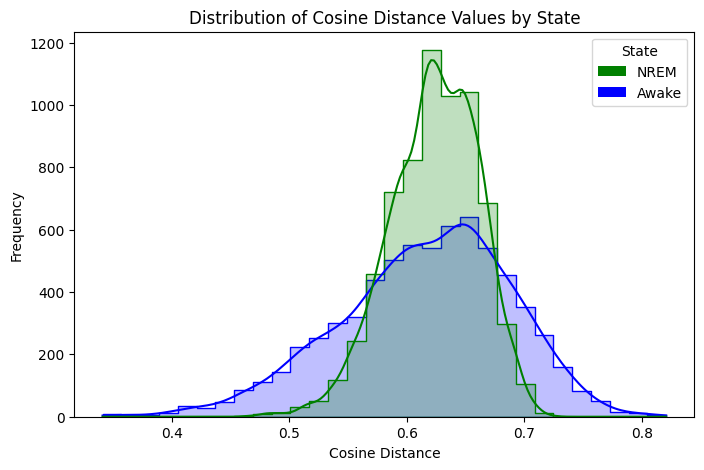

In [8]:
# Define experiment paths and corresponding file names
experiments = [
    ('5HT2afl05b_1', '7_12_SD2', 'TSeries-07122021-0901-002', 'velo_eeg.csv', 'dfof_mc.csv'),
    ('5HT2afl05b_2', '7_6_SD', 'TSeries-07062021-0844_MC2-004', 'velo_eeg.csv', 'dfof.csv'),
    ('126031_5', '11_23', 'TSeries-11232022-GC-MC-002', 'velo_eeg.csv', 'dfof.csv'),
    ('sert52b_1', '4_3_SD', 'TSeries-04032023-1323_SD_sess1-001', 'velo_eeg.csv', 'dfof.csv'),
    ('sert52b_5', '4_3_SD', 'TSeries-04032023-1323-001', 'velo_eeg.csv', 'dfof.csv'),
    ('sert54a_5', '4_4', 'TSeries-04042023-1023_sess1-001', 'velo_eeg.csv', 'dfof.csv'),
    ('5HT2afl05b_1', '6_29', 'TSeries-06292021-0808-001', 'velo_eeg.csv', 'dfof.csv'),
    #('5HT2afl05b_1', '7_1', 'TSeries-07012021-0854_MCs_afternoon-002', 'velo_eeg.csv', 'dfof.csv'),
    ('5HT2afl05b_1', '7_1', 'TSeries-07012021-0854_MCs-001', 'velo_eeg.csv', 'dfof.csv')
]

# Iterate over experiments
for exp_id, exp_name, ts_name, eeg_file, dfof_file in experiments:
    exp_path = google_drive.return_exp_path(exp_id, exp_name, ts_name)
    processed_sleep_df = pd.read_csv(join(exp_path, 'eeg', eeg_file))
    #file_name = dfof_file if 'mc' not in dfof_file else 'dfof_mc.csv'  # Adjust for different file naming
    dfof_data = pd.read_csv(join(exp_path, dfof_file))
    dfof_data.set_index('roi_label', drop=True, inplace=True)

    summary_sleep = clustering.df_generator(processed_sleep_df)
    result = clustering.process_dfof_mc(dfof_data, summary_sleep)
    d_awake = result['d_awake']
    d_sleep = result['d_sleep']
    cos_dist_nrem = clustering.calculate_cosine_distance(d_sleep, 'nrem', normalize=False)
    cos_dist_awake = clustering.calculate_cosine_distance(d_awake, 'awake', normalize=False)

    # Save cos_dist_nrem and cos_dist_awake to CSV files
    cos_dist_nrem.to_csv(join(exp_path, 'cos_dist_nrem.csv'), index=False)
    cos_dist_awake.to_csv(join(exp_path, 'cos_dist_awake.csv'), index=False)

    sorted_cos_dist_nrem = clustering.sort_distance_matrix(cos_dist_nrem)
    sorted_cos_dist_awake = clustering.sort_distance_matrix(cos_dist_awake)

    # Plot the sorted matrices using seaborn's heatmap function
    fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
    sns.heatmap(sorted_cos_dist_nrem, ax=axs[0], cmap="viridis", vmin=0, vmax=1)
    axs[0].set_title("Sorted Cosine Distance - NREM")
    sns.heatmap(sorted_cos_dist_awake, ax=axs[1], cmap="viridis")
    axs[1].set_title("Sorted Cosine Distance - Awake")
    plt.tight_layout()

    # Saving the figure
    fig.savefig(join(exp_path, "MC_sorted_cosine_dist.png"), dpi=300)

    # Flatten the matrices and remove the diagonal (self-distance) values
    distance_values_nrem = cos_dist_nrem.values.flatten()
    distance_values_nrem = distance_values_nrem[~np.isnan(distance_values_nrem)]  # Remove NaN values if any
    distance_values_nrem = distance_values_nrem[distance_values_nrem != 0]  # Remove self-distances

    distance_values_awake = cos_dist_awake.values.flatten()
    distance_values_awake = distance_values_awake[~np.isnan(distance_values_awake)]  # Remove NaN values if any
    distance_values_awake = distance_values_awake[distance_values_awake != 0]  # Remove self-distances

    # Combine the distance values into a single array with an associated label array
    distance_values_combined = np.concatenate([distance_values_nrem, distance_values_awake])
    states_combined = ['NREM'] * len(distance_values_nrem) + ['Awake'] * len(distance_values_awake)

    # Create DataFrame
    distances_df = pd.DataFrame({
        'Cosine Distance': distance_values_combined,
        'State': states_combined
    })

    distances_df['State'] = distances_df['State'].astype('category')

    # Calculate means and standard deviations
    mean_nrem = np.mean(distance_values_nrem)
    mean_awake = np.mean(distance_values_awake)
    std_nrem = np.std(distance_values_nrem, ddof=1)
    std_awake = np.std(distance_values_awake, ddof=1)

    # Calculate pooled standard deviation
    n_nrem = len(distance_values_nrem)
    n_awake = len(distance_values_awake)
    std_pooled = np.sqrt(((n_nrem - 1) * std_nrem**2 + (n_awake - 1) * std_awake**2) / (n_nrem + n_awake - 2))

    # Calculate Cohen's d
    cohen_d = (mean_nrem - mean_awake) / std_pooled
    print(f"Cohen's d: {cohen_d:.2f}")

    # Perform power analysis
    alpha = 0.05  # significance level
    power = 0.8   # desired power

    # Power analysis to determine required sample size
    analysis = TTestIndPower()
    sample_size = analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power, alternative='two-sided')

    print(f"Required sample size per group: {sample_size:.2f}")

    # Perform the Kolmogorov-Smirnov test
    ks_statistic, p_value = ks_2samp(distance_values_nrem, distance_values_awake)
    print(f"KS Statistic: {ks_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Plot
    plt.figure(figsize=(8, 5))
    ax = sns.histplot(
        data=distances_df,
        x='Cosine Distance',
        hue='State',
        kde=True,
        element='step',
        bins=30,
        palette=['green', 'blue']  # Explicitly set the palette here to match your desired colors
    )

    plt.title('Distribution of Cosine Distance Values by State')
    plt.xlabel('Cosine Distance')
    plt.ylabel('Frequency')

    # Create custom legend handles with colors matching the plot
    legend_handles = [
        Patch(facecolor='green', label='NREM'),
        Patch(facecolor='blue', label='Awake')
    ]

    # Use the custom handles to create the legend, ensuring colors match the plot
    plt.legend(handles=legend_handles, title='State')

    # Saving the figure
    plt.savefig(join(exp_path, 'MC_distrib_cosine_distance_values.png'), dpi=300)

In [ ]:
from scipy.stats import ks_2samp

# Separate the distance values for each state
distance_values_nrem = distances_df[distances_df['State'] == 'NREM']['Cosine Distance']
distance_values_awake = distances_df[distances_df['State'] == 'Awake']['Cosine Distance']

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(distance_values_nrem, distance_values_awake)

# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The distributions of NREM and Awake states are statistically different.")
else:
    print("There is no significant difference in the distributions of NREM and Awake states.")


KS Statistic: 0.07973041370308215
P-value: 0.0
The distributions of NREM and Awake states are statistically different.
